# Functions and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

def gradientDescent(X_train, X_test, y_train, y_test, learning_rate=0.1, iteration=1000):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    rmse_train = np.empty(iteration)
    rmse_test = np.empty(iteration)

    for i in range(iteration):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * learning_rate * (X_train.T.dot((pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)

    return theta, rmse_train, rmse_test

In [3]:
def cost_func_L1(theta, X, y,lam = 0.5):
    m = len(X)
    pred = X.dot(theta)
    cost = ((1/m) * np.sum(np.square(pred - y))) + (lam*(np.sum(np.abs(theta))) * (1/m))
    return cost**(1/2)

def gradientDescent_L1(X_train, X_test, y_train, y_test, learning_rate=0.1, iteration=1000,lam = 0.5):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    rmse_train = np.empty(iteration)
    rmse_test = np.empty(iteration)

    for i in range(iteration):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * learning_rate * (X_train.T.dot((pred - y_train)) + lam*(np.sign(theta)))
        rmse_train[i] = cost_func_L1(theta, X_train, y_train,lam)
        rmse_test[i] = cost_func_L1(theta, X_test, y_test,lam)

    return theta, rmse_train, rmse_test

In [4]:
def cost_func_L2(theta, X, y,lam = 0.5):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) *((np.sum(np.square(pred - y))) + lam*(np.sum(np.square(theta))))
    return cost**(1/2)

def gradientDescent_L2(X_train, X_test, y_train, y_test, learning_rate=0.1, iteration=1000,lam = 0.5):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    rmse_train = np.empty(iteration)
    rmse_test = np.empty(iteration)

    for i in range(iteration):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * learning_rate * (X_train.T.dot((pred - y_train)) + lam*2*(theta))
        rmse_train[i] = cost_func_L2(theta, X_train, y_train,lam)
        rmse_test[i] = cost_func_L2(theta, X_test, y_test,lam)

    return theta, rmse_train, rmse_test

In [5]:
def closedForm(X_train, X_test, y_train, y_test):

    squareMatrix = X_train.T @ X_train
    inverse = np.linalg.inv(squareMatrix)
    temp = inverse @ X_train.T
    theta = temp @ y_train

    rmse_train = cost_func(theta, X_train, y_train)
    rmse_test = cost_func(theta, X_test, y_test)

    return theta, rmse_train, rmse_test

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

# Question 1

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
df = pd.read_csv('abalone.csv')

df.iloc[:, 0] = LabelEncoder().fit_transform(df.iloc[:, 0])

In [7]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(df)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X_c = np.c_[np.ones((len(X), 1), dtype='int'), X]

X_train, X_test, y_train, y_test = train_test_split(X_c, y, test_size=0.2, random_state=1)

In [9]:
theta1, rmse_train1, rmse_test1 = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 5000)

## RMSE vs Gradient descent iterations ( Training & Testing )

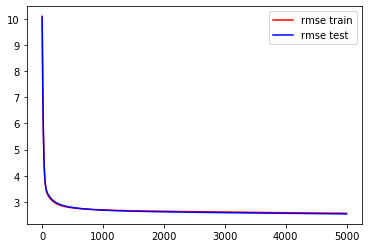

In [10]:
X_in =  np.arange(5000)

plt.plot(X_in, rmse_train1, color='r', label='rmse train')
plt.plot(X_in, rmse_test1, color='b', label='rmse test')

plt.legend()

In [11]:
theta2, rmse_train2, rmse_test2 = closedForm(X_train, X_test, y_train, y_test)

## Closed form and Gradient Descent RMSE

In [12]:
print('\nGradient Descent\nRMSE train :     {:0.3f}\nRMSE test :      {:0.3f}'.format(rmse_train1[-1],rmse_test1[-1]))
print('\nClosed Form\nRMSE train :     {:0.3f}\nRMSE test :      {:0.3f}'.format(rmse_train2,rmse_test2))


Gradient Descent
RMSE train :     2.561
RMSE test :      2.537

Closed Form
RMSE train :     2.216
RMSE test :      2.214


### We can clearly see that no matter how many iterations we perform and what learning rate we take gradient descent is not able to give us RMSE lesser than closed form so we can say that using closed form we obtain optimum value for theta and achieve least RMSE.

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

# Question 2

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
C = np.linspace(0, 25, 50)
hyperparameters = dict(alpha=C)

In [14]:
gridSearch = GridSearchCV(Ridge(), hyperparameters, cv=5)
best_model = gridSearch.fit(X, y)
lamb_l2 = best_model.best_params_['alpha']

gridSearch = GridSearchCV(Lasso(), hyperparameters, cv=5)
best_model = gridSearch.fit(X, y)
lamb_l1 = best_model.best_params_['alpha']

## Optimum regularization parameter value for L1

In [15]:
print("Best alpha for Lasso Regression i.e L1: ", lamb_l1)

Best alpha for Lasso Regression i.e L1:  0.0


## Optimum regularization parameter value for L2

In [16]:
print("Best alpha for Ridge Regression i.e L2: ", lamb_l2)

Best alpha for Ridge Regression i.e L2:  1.0204081632653061


In [17]:
theta1, rmse_train1, rmse_test1 = gradientDescent_L1(X_train, X_test, y_train, y_test, 0.01, 5000, lamb_l1)

## L1 regularization

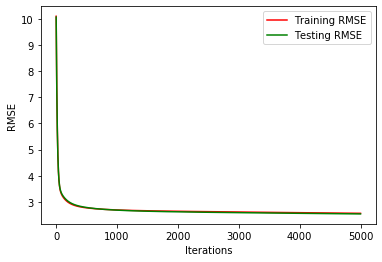

In [18]:
it = np.arange(5000)
plt.plot(it, rmse_train1, c='red', label='Training RMSE')
plt.plot(it, rmse_test1, c='green', label='Testing RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

In [19]:
print('RMSE for training set using gradient descent L1 regularization: ', rmse_train1[-1])
print('RMSE for testing set using gradient descent L1 regularization: ',  rmse_test1[-1])

RMSE for training set using gradient descent L1 regularization:  2.560596840978946
RMSE for testing set using gradient descent L1 regularization:  2.5370122001761763


## L2 Regularization

In [20]:
theta2, rmse_train2, rmse_test2 = gradientDescent_L2(X_train, X_test, y_train, y_test, 0.01, 5000, lamb_l2)

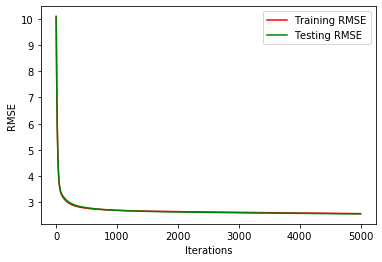

In [21]:
it = np.arange(5000)
plt.plot(it, rmse_train2, c='red', label='Training RMSE')
plt.plot(it, rmse_test2, c='green', label='Testing RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

In [22]:
print('RMSE for training set using gradient descent L1 regularization: ', rmse_train2[-1])
print('RMSE for testing set using gradient descent L1 regularization: ',  rmse_test2[-1])

RMSE for training set using gradient descent L1 regularization:  2.566331854888715
RMSE for testing set using gradient descent L1 regularization:  2.5547048467835705


---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

# Question 3

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
def gradientDescent(X, y, learning_rate=0.1, iteration=1000):
    m = len(y)
    theta = np.zeros(X.shape[1]).T
    rmse = np.empty(iteration)

    for i in range(iteration):
        pred = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((pred - y)))
        rmse[i] = cost_func(theta, X, y)

    print('\nTheta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0],theta[1]))
    return theta, rmse

def gradientDescent_L1(X, y, learning_rate=0.1, iteration=1000,lam = 0.5):
    m = len(y)
    theta = np.zeros(X.shape[1]).T
    rmse = np.empty(iteration)

    for i in range(iteration):
        pred = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((pred - y)) + lam*(np.sign(theta)))
        rmse[i] = cost_func_L1(theta, X, y)

        
    print('\nTheta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0],theta[1]))
    return theta,rmse

def gradientDescent_L2(X, y, learning_rate=0.1, iteration=1000,lam = 0.5):
    m = len(y)
    theta = np.zeros(X.shape[1]).T
    rmse = np.empty(iteration)

    for i in range(iteration):
        pred = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((pred - y)) + lam*2*(theta))
        rmse[i] = cost_func_L2(theta, X, y)

    print('\n\nTheta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0],theta[1]))
    return theta, rmse

In [24]:
database = pd.read_csv('head_brain.csv')

database = scaler.fit_transform(database)

In [25]:
X = database[:, 0]
y = database[:, -1]

## NO regularization

In [26]:
X_c = np.c_[np.ones((len(X), 1), dtype='int'), X]

theta, rmse = gradientDescent(X_c, y, 0.02, 20000)


Theta0:          0.128
Theta1:          0.785


Text(0, 0.5, 'Brain Weight (grams)')

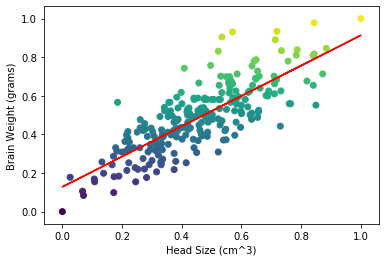

In [27]:
y_pred = theta[0] + theta[1] * X
plt.plot(X, y_pred, color='r', label='Gradient Descent')

plt.scatter(X, y, c=y)

plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

## L1 Regularization

In [28]:
theta_L1, rmse_L1 = gradientDescent_L1(X_c, y, 0.02, 20000)


Theta0:          0.142
Theta1:          0.749


Text(0, 0.5, 'Brain Weight (grams)')

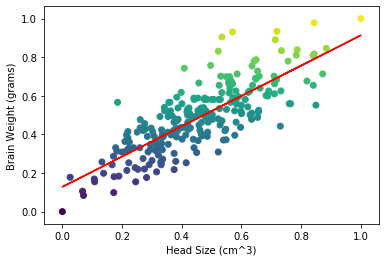

In [29]:
y_pred = theta[0] + theta[1] * X
plt.plot(X, y_pred, color='r', label='Gradient Descent')

plt.scatter(X, y, c=y)

plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

## L2 Regularization

In [30]:
theta_L2, rmse_L2 = gradientDescent_L2(X_c, y, 0.02, 20000)



Theta0:          0.164
Theta1:          0.703


Text(0, 0.5, 'Brain Weight (grams)')

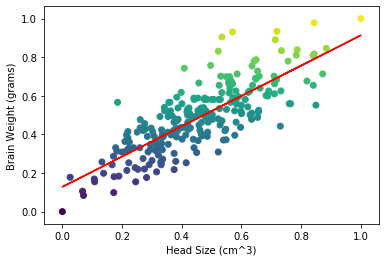

In [31]:
y_pred = theta[0] + theta[1] * X
plt.plot(X, y_pred, color='r', label='Gradient Descent')

plt.scatter(X, y, c=y)

plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

## RMSE plot (Comparison) 

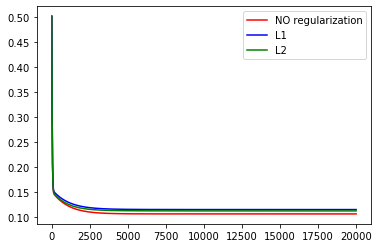

In [32]:
X_in =  np.arange(20000)

plt.plot(X_in, rmse, color='r', label='NO regularization')
plt.plot(X_in, rmse_L1, color='b', label='L1')
plt.plot(X_in, rmse_L2, color='g', label='L2')

plt.legend()

### Visually there is a very little change in the best fit line that we can't see it directly so all these methods provide us similiar line in this dataset. However in huge datasets this difference can be visible directly.